# Project  - Vehicle Performance Prediction

## Problem Statement
Most players in the automotive sector are investing in ML for their marketing efforts, a
much smaller group is putting in place incentives and key performance indicators 
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment 
to developing ML capability that is not just useful but also used. Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled 
per litre)

## Dataset Information:

The data is about the technical specifications of cars. 
- Kilometer_per_liter: distance in kilometre travelled per litre
- cylinders: No of cylinders
- displacement: displacement
- horsepower: A horsepower is a unit of measurement of power, or the rate at 
which work is done, usually in reference to the output of 
engines or motors
- weight: Weight of car
- acceleration: Acceleration of Car
- model year: Model Year of the car
- origin: Country origin
- car name: Car brand and model name (unique for each instance)


### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from statsmodels.tools.eval_measures import rmse
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings

In [15]:
filterwarnings("ignore")
pd.options.display.max_columns = None

### Loading the dataset

In [16]:
df = pd.read_csv("vehicle performance prediction.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


### Data Preparation

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [19]:
df.origin = df.origin.astype("object")

In [20]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [21]:
df.shape

(398, 9)

In [22]:
df.drop(df[df.horsepower=="?"].index, axis = 0, inplace = True)
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [23]:
df.horsepower = df.horsepower.astype(int)

In [24]:
df[["manufacturer","model"]] = df.name.str.split(" ", n = 1 , expand = True)
df.drop("name",axis = 1,inplace= True)
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140,3449,10.5,1970,7.227443,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880,ford,mustang gl
394,2,4,97.0,52,2130,24.6,1982,18.706323,vw,pickup
395,1,4,135.0,84,2295,11.6,1982,13.604599,dodge,rampage
396,1,4,120.0,79,2625,18.6,1982,11.904024,ford,ranger


In [25]:
df.manufacturer.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [26]:
correction = {"chevy":"chevrolet",
             "toyouta":"toyota",
             "maxda":"mazda",
             "chevroelt":"chevrolet",
             "vw":"volkswagen",
             "mercedes-benz":"mercedes",
             "vokswagen":"volkswagen"}
df.manufacturer = df.manufacturer.map(correction).fillna(df.manufacturer)

In [27]:
df.manufacturer.value_counts()

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
volvo          6
chrysler       6
opel           4
subaru         4
saab           4
mercedes       3
renault        3
bmw            2
cadillac       2
nissan         1
capri          1
hi             1
triumph        1
Name: manufacturer, dtype: int64

In [28]:
import re
def standardize(x):
    return re.sub("[^A-Za-z0-9]+", "", (str(x)))
df.model = df.model.apply(lambda x : standardize(x))

In [29]:
df.model.value_counts()

matador             5
rabbit              5
pinto               5
corolla             5
chevette            4
                   ..
810maxima           1
model111            1
centurylimited      1
rx2coupe            1
celicagtliftback    1
Name: model, Length: 293, dtype: int64

In [30]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [31]:
df.describe(include = "object")

,origin,manufacturer,model
count,392,392,392
unique,3,30,293
top,1,ford,matador
freq,245,48,5


In [32]:
df.drop("model", axis = 1, inplace = True)
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer
0,1,8,307.0,130,3504,12.0,1970,7.652587,chevrolet
1,1,8,350.0,165,3693,11.5,1970,6.377156,buick
2,1,8,318.0,150,3436,11.0,1970,7.652587,plymouth
3,1,8,304.0,150,3433,12.0,1970,6.802299,amc
4,1,8,302.0,140,3449,10.5,1970,7.227443,ford
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880,ford
394,2,4,97.0,52,2130,24.6,1982,18.706323,volkswagen
395,1,4,135.0,84,2295,11.6,1982,13.604599,dodge
396,1,4,120.0,79,2625,18.6,1982,11.904024,ford


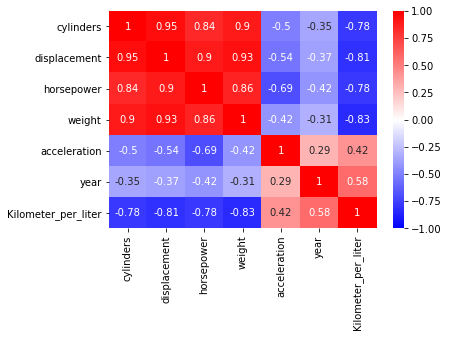

In [33]:
sns.heatmap(data = df.corr(), cmap = "bwr", vmin = -1, vmax = 1, annot = True)

In [34]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(include = "object")

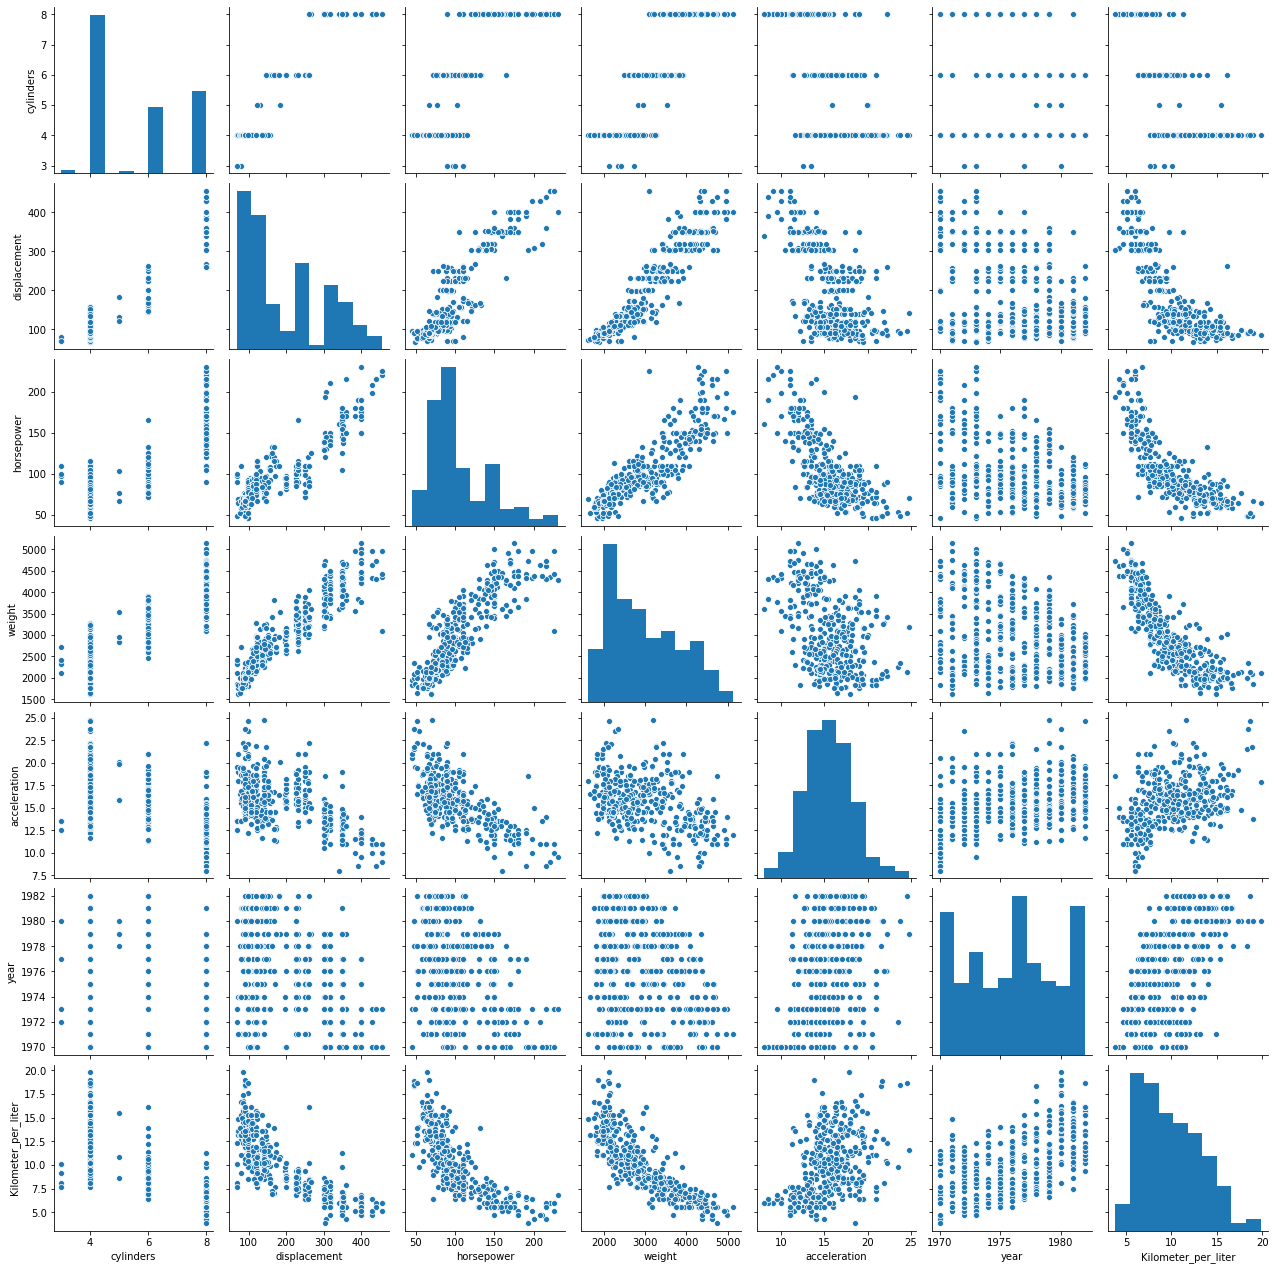

In [35]:
sns.pairplot(data = df_num)

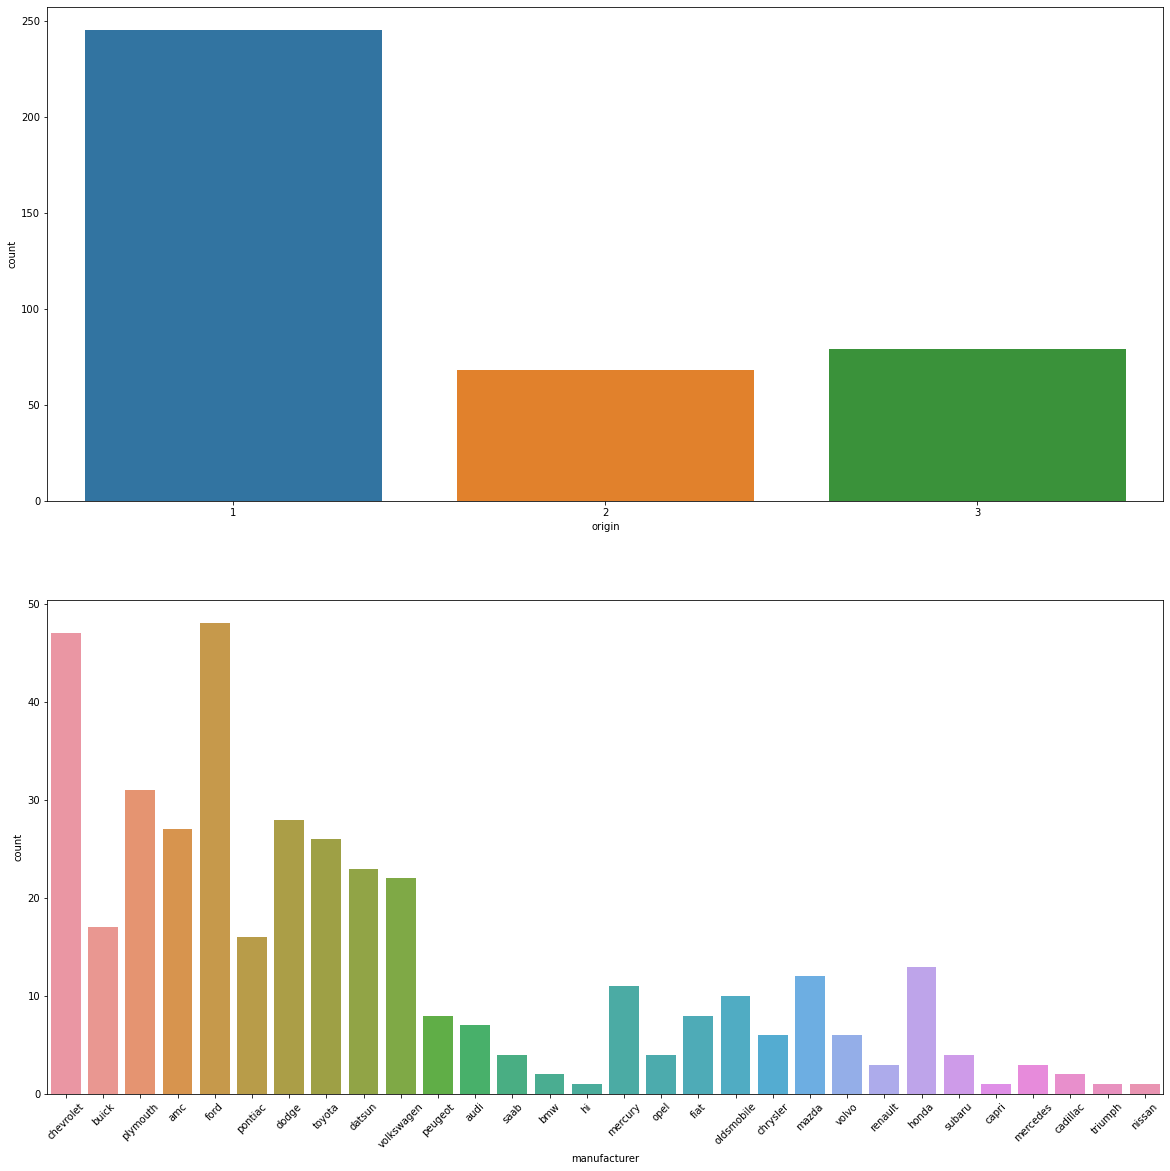

In [36]:
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize= (20,20))
for i,j in zip(df_cat.columns, ax.flatten()):
    sns.countplot(data = df_cat , x = i, ax = j)
    plt.xticks(rotation = 45)
plt.show()

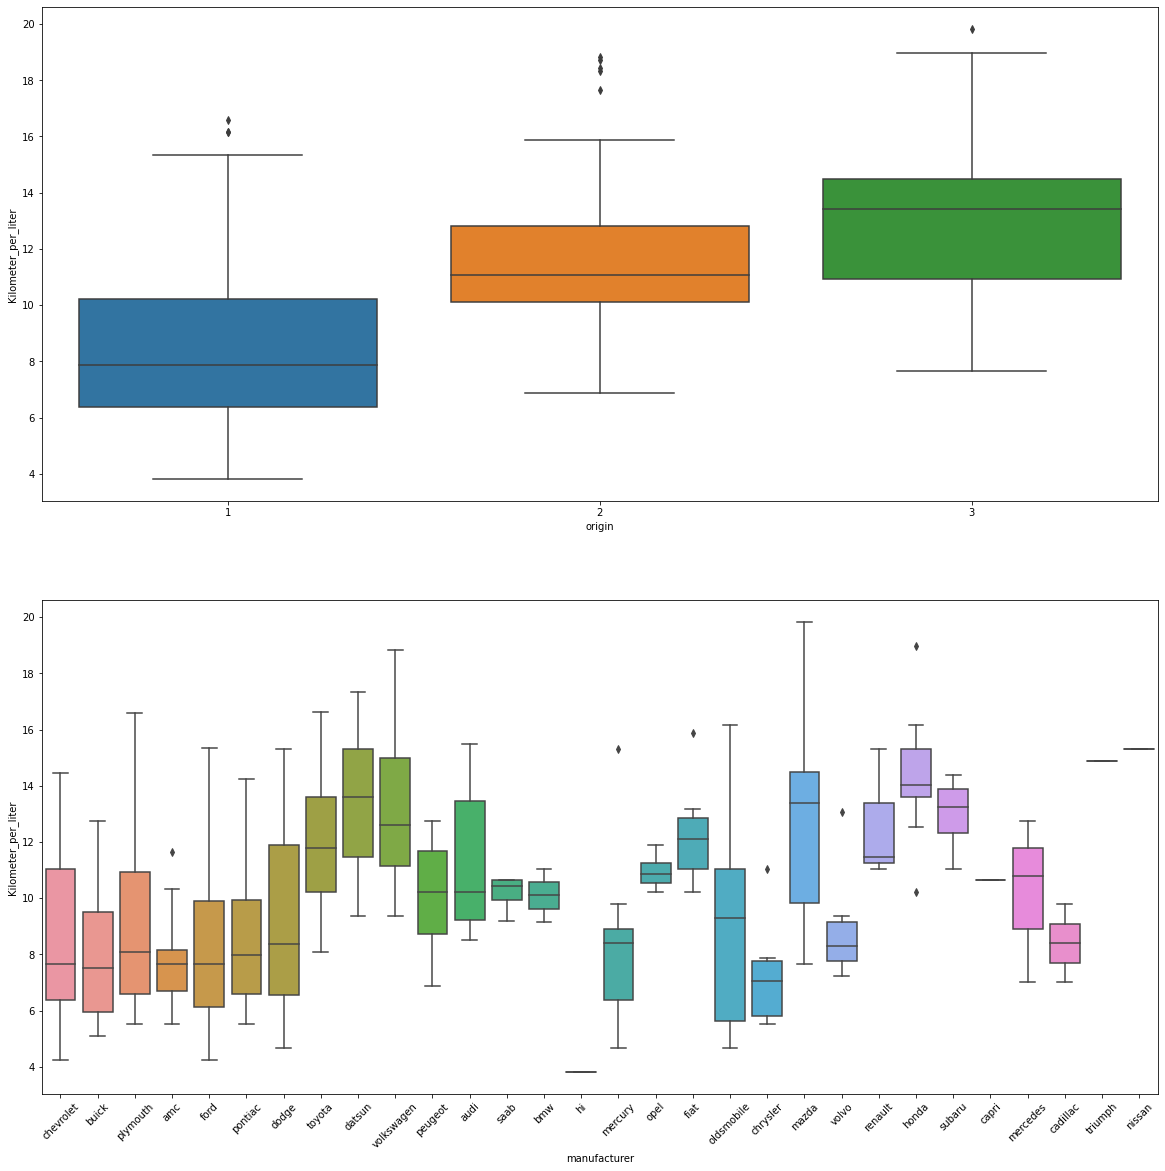

In [37]:
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize= (20,20))
for i,j in zip(df_cat.columns, ax.flatten()):
    sns.boxplot(data = df, x = i, y = "Kilometer_per_liter", ax = j)
    plt.xticks(rotation = 45)
plt.show()

In [38]:
new_df = (df.manufacturer.value_counts()>5).reset_index()
val = new_df["index"][new_df.manufacturer == True]
new_df= pd.DataFrame()
for i in val:
    new_df = pd.concat([new_df,df[df.manufacturer == i]],axis = 0)
new_df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer
4,1,8,302.0,140,3449,10.5,1970,7.227443,ford
5,1,8,429.0,198,4341,10.0,1970,6.377156,ford
17,1,6,200.0,85,2587,16.0,1970,8.928018,ford
25,1,8,360.0,215,4615,14.0,1970,4.251437,ford
36,1,6,250.0,88,3302,15.5,1971,8.077730,ford
...,...,...,...,...,...,...,...,...,...
94,1,8,440.0,215,4735,11.0,1973,5.526868,chrysler
231,1,8,400.0,190,4325,12.2,1977,6.589727,chrysler
292,1,8,360.0,150,3940,13.0,1979,7.865159,chrysler
366,1,6,225.0,85,3465,16.6,1981,7.482529,chrysler


### Adding Dummy Variables

In [39]:
df_cat_dummy = pd.get_dummies(df_cat,drop_first = True)
final_df = pd.concat([df_num,df_cat_dummy], axis = 1)
final_df

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_2,origin_3,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_capri,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_hi,manufacturer_honda,manufacturer_mazda,manufacturer_mercedes,manufacturer_mercury,manufacturer_nissan,manufacturer_oldsmobile,manufacturer_opel,manufacturer_peugeot,manufacturer_plymouth,manufacturer_pontiac,manufacturer_renault,manufacturer_saab,manufacturer_subaru,manufacturer_toyota,manufacturer_triumph,manufacturer_volkswagen,manufacturer_volvo
0,8,307.0,130,3504,12.0,1970,7.652587,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165,3693,11.5,1970,6.377156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150,3436,11.0,1970,7.652587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,8,304.0,150,3433,12.0,1970,6.802299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140,3449,10.5,1970,7.227443,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,1982,11.478880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
394,4,97.0,52,2130,24.6,1982,18.706323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
395,4,135.0,84,2295,11.6,1982,13.604599,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396,4,120.0,79,2625,18.6,1982,11.904024,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
stats, p = shapiro(df.Kilometer_per_liter)
print("Statistics = %.3f, P-value = %.7f" % (stats,p))

Statistics = 0.967, P-value = 0.0000001


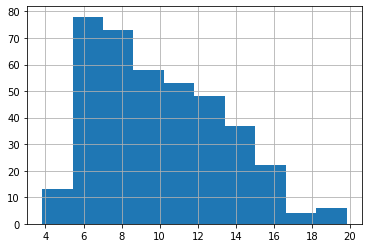

In [41]:
df.Kilometer_per_liter.hist()

In [42]:
final_df["log_mileage"] = np.log(final_df.Kilometer_per_liter)

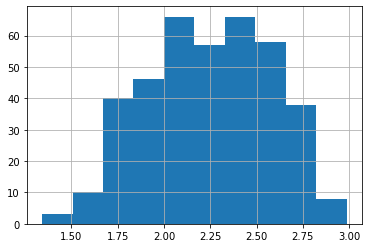

In [43]:
final_df.log_mileage.hist()

In [44]:
stats, p = shapiro(final_df.log_mileage)
print("Statistics = %.3f, P-value = %.7f" % (stats,p))

Statistics = 0.982, P-value = 0.0000704


In [45]:
final_df

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,origin_2,origin_3,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_capri,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_hi,manufacturer_honda,manufacturer_mazda,manufacturer_mercedes,manufacturer_mercury,manufacturer_nissan,manufacturer_oldsmobile,manufacturer_opel,manufacturer_peugeot,manufacturer_plymouth,manufacturer_pontiac,manufacturer_renault,manufacturer_saab,manufacturer_subaru,manufacturer_toyota,manufacturer_triumph,manufacturer_volkswagen,manufacturer_volvo,log_mileage
0,8,307.0,130,3504,12.0,1970,7.652587,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.035044
1,8,350.0,165,3693,11.5,1970,6.377156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.852722
2,8,318.0,150,3436,11.0,1970,7.652587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.035044
3,8,304.0,150,3433,12.0,1970,6.802299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.917261
4,8,302.0,140,3449,10.5,1970,7.227443,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.977885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,1982,11.478880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.440509
394,4,97.0,52,2130,24.6,1982,18.706323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.928862
395,4,135.0,84,2295,11.6,1982,13.604599,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.610408
396,4,120.0,79,2625,18.6,1982,11.904024,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.476876


### Standardizing the Data and Building the Models

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = final_df.drop(["Kilometer_per_liter","log_mileage"], axis = 1)
X = scaler.fit_transform(x)
Y = final_df
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [47]:
sgd = SGDRegressor(loss = "squared_loss", alpha = 0.1, max_iter = 1000)

In [48]:
sgd.fit(x_train, y_train.log_mileage)
y_sgd_pred_log = sgd.predict(x_test)
r_sgd_log = sgd.score(x_train,y_train.log_mileage)
print("R-squared = ", r_sgd_log)
y_sgd_pred_exp = np.exp(y_sgd_pred_log)
rmse_sgd_log = rmse(y_sgd_pred_exp,y_test.Kilometer_per_liter) 
print("Rmse = ", rmse_sgd_log)

R-squared =  0.5966719325034107
Rmse =  1.9693360908131343


In [49]:
sgd.fit(x_train, y_train.Kilometer_per_liter)
y_sgd_pred_normal = sgd.predict(x_test)
r_sgd_normal = sgd.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_sgd_normal)
rmse_sgd_normal = rmse(y_sgd_pred_normal,y_test.Kilometer_per_liter)
print("Rmse = ", rmse_sgd_normal)

R-squared =  0.7448050906548471
Rmse =  1.7475983286380474


In [50]:
ols = LinearRegression()
ols.fit(x_train, y_train.log_mileage)
y_ols_pred_log = ols.predict(x_test)
r_ols_log = ols.score(x_train,y_train.log_mileage)
print("R-squared = ", r_ols_log)
y_ols_pred_exp = np.exp(y_ols_pred_log)
rmse_ols_log = rmse(y_ols_pred_exp,y_test.Kilometer_per_liter)
print("Rmse = ", rmse_ols_log)

R-squared =  0.8975885411133173
Rmse =  1.3520227982268993


In [51]:
ols.fit(x_train, y_train.Kilometer_per_liter)
y_ols_pred_normal = ols.predict(x_test)
r_ols_normal = ols.score(x_train,y_train.Kilometer_per_liter)
print("R-squared = ", r_ols_normal)
rmse_ols_normal = rmse(y_ols_pred_exp,y_test.Kilometer_per_liter)
print("Rmse = ", rmse_ols_normal)

R-squared =  0.8459547137426529
Rmse =  1.3520227982268993


### Results 

In [52]:
model_summary = {"Model": ["SGD Log Model", "SGD Normal Model",
                           "OLS Log Model", "OLS Normal Model"],
                "R-Squared": [r_sgd_log,r_sgd_normal,r_ols_log,r_ols_normal],
                "Rmse":[rmse_sgd_log,rmse_sgd_normal,rmse_ols_log,rmse_ols_normal]}
pd.DataFrame(model_summary)

,Model,R-Squared,Rmse
0,SGD Log Model,0.596672,1.969336
1,SGD Normal Model,0.744805,1.747598
2,OLS Log Model,0.897589,1.352023
3,OLS Normal Model,0.845955,1.352023
